In [1]:
import sys
sys.path.append('/home/royhirsch_google_com/image_editing')

import os
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

from sd_utils import get_sd_pipe, _GENERATION_CONFIGS
from hspace_helpers import get_pipeline_with_h_space

In [2]:
model_name = '2.1'
pipe = get_sd_pipe(model_name, enable_model_cpu_offload=True)
config = _GENERATION_CONFIGS[model_name]
device = torch.device('cuda:1')

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

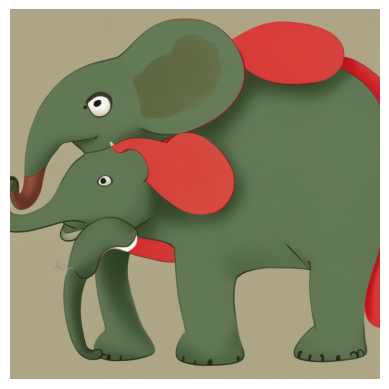

In [5]:
torch.manual_seed(10)
prompt = "An illustration of a small green elephant standing behind a large red mouse"

center_latents = torch.randn(size=(1, 4, 128, 128), dtype=torch.float16)
image = pipe(prompt=prompt, latents=center_latents, **config).images[0]
plt.imshow(image)
plt.axis(False)
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

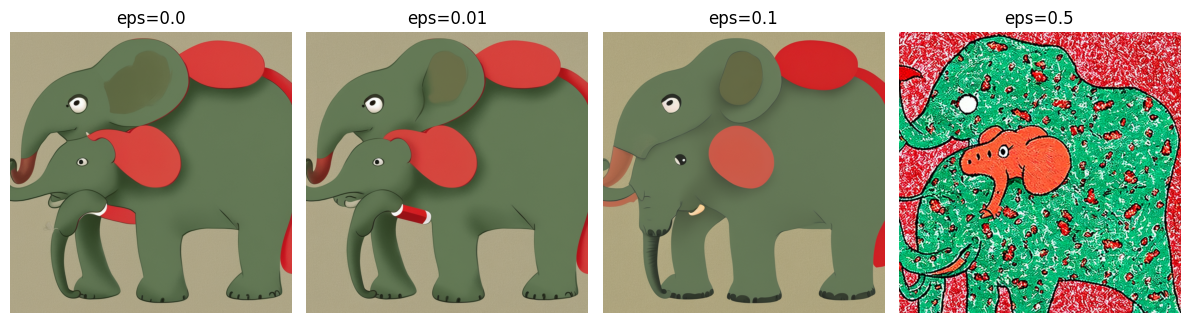

: 

In [ ]:
eps_range = [0., 0.01, 0.1, 0.5]
fig, axes = plt.subplots(1, len(eps_range), figsize=(len(eps_range) * 3, 8)) 
for ind, eps in enumerate(eps_range):
    latents = center_latents + eps * torch.randn_like(center_latents)
    image = pipe(prompt=prompt, latents=latents, **config).images[0]

    axes[ind].imshow(image)
    # axes[ind].set_title('Tifa: {:.3f}'.format(score))
    axes[ind].set_title(f'eps={eps}')
    axes[ind].axis('off')
plt.tight_layout()
plt.show()